# Big Test

## Dependencies

In [0]:
# opencv
# used for downloading images
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [0]:
# Mask R-CNN code
!git clone https://github.com/matterport/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Counting objects: 721, done.
remote: Total 721 (delta 0), reused 0 (delta 0), pack-reused 721
Receiving objects: 100% (721/721), 107.30 MiB | 41.33 MiB/s, done.
Resolving deltas: 100% (404/404), done.


In [0]:
import os
os.chdir('Mask_RCNN')

# Mask R-CNN dependencies
!pip3 install -r requirements.txt
!python setup.py install

# COCO tools
!pip3 install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI
!pip3 install pycocotools

# Windowing backend
!pip3 install pyqt5

    100% |████████████████████████████████| 3.4MB 4.9MB/s 
    100% |████████████████████████████████| 634kB 16.6MB/s 
    100% |████████████████████████████████| 112kB 20.1MB/s 
    100% |████████████████████████████████| 112kB 22.0MB/s 
    100% |████████████████████████████████| 204kB 19.0MB/s 


    100% |████████████████████████████████| 1.9MB 10.2MB/s 
    100% |████████████████████████████████| 163kB 21.3MB/s 
    100% |████████████████████████████████| 2.2MB 11.1MB/s 
    100% |████████████████████████████████| 8.1MB 2.6MB/s 
    100% |████████████████████████████████| 71kB 14.9MB/s 
    100% |████████████████████████████████| 552kB 16.7MB/s 


  Running setup.py bdist_wheel for imgaug ... - \ done
  Stored in directory: /content/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/model.py -

    100% |████████████████████████████████| 107.8MB 354kB/s 
    100% |████████████████████████████████| 71kB 18.2MB/s 


## Imports

In [0]:
from gc import collect

In [0]:
from google.colab.files import upload
from google.colab.files import download

In [0]:
from csv import reader
from csv import writer

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from numpy import frombuffer
from numpy import empty
from numpy import float32
from numpy import uint8
from numpy import save
from numpy import load
from numpy import amax
from numpy import floor
from numpy.random import shuffle
from numpy import arange

In [0]:
from io import BytesIO
from googleapiclient.http import MediaIoBaseDownload

In [0]:
from cv2 import imdecode

In [0]:
#from keras.models import load_model
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.utils import Sequence
from keras.backend import mean as keras_mean
from keras.backend import square as keras_square

Using TensorFlow backend.


## Load File IDs

In [0]:
!ls

datalab  Mask_RCNN


In [0]:
!ls | wc -l

1


In [0]:
foo = upload()
foo = None

Saving ids_complete.csv to ids_complete.csv


In [0]:
!mv ids_complete.csv ids.csv

In [0]:
color_id_list = []
label_id_list = []

with open('ids.csv', 'r', newline='') as csvfile:
  spamreader = reader(csvfile, delimiter=',')
  for row in spamreader:
    color_id_list.append(row[0])
    label_id_list.append(row[1])

In [0]:
c_ids, c_val_ids, l_ids, l_val_ids = train_test_split(color_id_list,
                                                      label_id_list,
                                                      test_size=0.1,
                                                      random_state=42)

In [0]:
num = len(c_ids)
vnum = len(c_val_ids)
print(num)
print(vnum)

1003
112


In [0]:
collect()# garbage

175

## Define Models

In [0]:
input_img = Input(shape=(2710, 3384, 4))

In [0]:
x = Conv2D(4, (3, 3), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(input_img)
print(x._keras_shape)

x = Conv2D(4, (5, 5), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

x = Conv2D(3, (5, 5), activation='relu', padding='same',
          kernel_regularizer=l2(0.001), name='encoder')(x)
print(x._keras_shape)


x = Conv2D(3, (5, 5), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

x = Conv2D(4, (5, 5), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

x = Conv2D(4, (3, 3), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

x = Conv2D(4, (3, 3), activation='sigmoid', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

autoencoder_v1 = Model(input_img, x)
x = None

(None, 2710, 3384, 4)
(None, 2710, 3384, 4)
(None, 2710, 3384, 3)
(None, 2710, 3384, 3)
(None, 2710, 3384, 4)
(None, 2710, 3384, 4)
(None, 2710, 3384, 4)


In [0]:
def my_error(y_true, y_pred):
  # MSE * 100
  return keras_mean(keras_square(10 * (y_pred - y_true)), axis=-1)

In [0]:
x = Conv2D(4, (3, 3), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(input_img)
print(x._keras_shape)

x = Conv2D(4, (5, 5), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

x = Conv2D(4, (5, 5), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

x = Conv2D(3, (5, 5), activation='relu', padding='same',
          kernel_regularizer=l2(0.001), name='encoder')(x)
print(x._keras_shape)


# x = Conv2D(3, (5, 5), activation='relu', padding='same',
#           kernel_regularizer=l2(0.001))(x)
# print(x._keras_shape)

x = Conv2D(4, (5, 5), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

x = Conv2D(4, (3, 3), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

x = Conv2D(4, (3, 3), activation='relu', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

x = Conv2D(4, (3, 3), activation='sigmoid', padding='same',
          kernel_regularizer=l2(0.001))(x)
print(x._keras_shape)

autoencoder_v2 = Model(input_img, x)
x = None

(None, 2710, 3384, 4)
(None, 2710, 3384, 4)
(None, 2710, 3384, 4)
(None, 2710, 3384, 3)
(None, 2710, 3384, 4)
(None, 2710, 3384, 4)
(None, 2710, 3384, 4)
(None, 2710, 3384, 4)


In [0]:
collect()# garbage

8320

### Mask RCNN

In [0]:
import os
import sys
import random
import math
import numpy as np
import cv2

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

# COCO Class names
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

... done downloading pretrained model!


In [0]:
# Model Configuration Settings
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [0]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

## Load Weights

In [0]:
foo = upload()
foo = None

Saving weights-03-0.28.h5 to weights-03-0.28.h5


In [0]:
!mv weights_e1_75.h5 weights_v1.h5

In [0]:
!mv 'weights-03-0.28.h5' weights_v2.h5

In [0]:
autoencoder_v1.load_weights('weights_v1.h5')

In [0]:
autoencoder_v2.load_weights('weights_v2.h5')

## Google Drive
Data can be downloaded from Google Drive using the REST API.

In [0]:
from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [0]:
def download_image(file_id):
  request = drive_service.files().get_media(fileId=file_id)
  downloaded = BytesIO()#io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = downloader.next_chunk()

  downloaded.seek(0)

  foo = frombuffer(downloaded.getvalue(), dtype=uint8)
  drive_image = imdecode(foo, -1)
  return drive_image

## Download Images

In [0]:
dimensions = (2710, 3384, 4)
X = empty((1, *dimensions))

In [0]:
def m_save(list_ID, label_ID, fname):
  mask = download_image(label_ID)
  biggest = amax(mask)
  X[0, :, :, 3] = mask / biggest
  mask = None

  X[0, :, :, :3] = download_image(list_ID) / 255
  save(fname, X)

In [0]:
m_save(c_val_ids[4], l_val_ids[4], "val0")

In [0]:
!ls

assets	 images       mask_rcnn_coco.h5   requirements.txt  val0.npy
build	 LICENSE      mask_rcnn.egg-info  samples	    weights_v1.h5
dist	 logs	      mrcnn		  setup.cfg
ids.csv  MANIFEST.in  README.md		  setup.py


In [0]:
print(c_val_ids[4])

1TcYURWVplhh8hzQaczIMG7W3IH3Tz5ER


In [0]:
drive_image = download_image(c_val_ids[4])

# Inference
**Tensors!**

In [0]:
import matplotlib.pyplot as plt

Processing 1 images
image                    shape: (2710, 3384, 3)       min:    6.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 3384.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


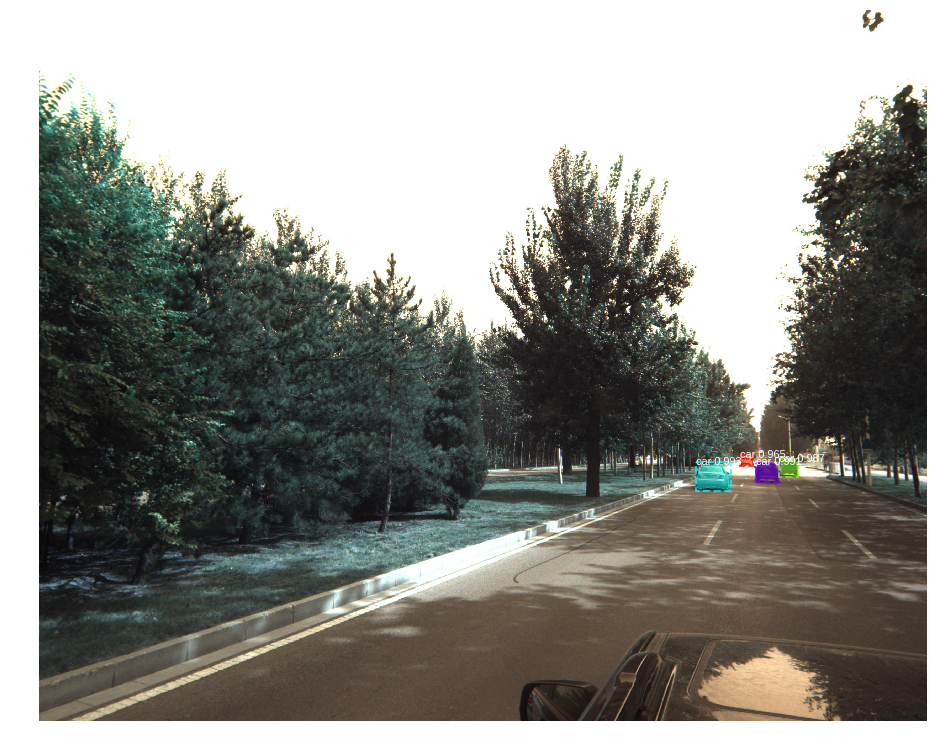

Time to Mask Image = 4.5882 seconds


In [0]:
#DEREK WAZ HERE
%matplotlib inline

import time
elapsed = time.time()

# Run detection
results = model.detect([drive_image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(drive_image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

print('Time to Mask Image = ' + str(round(time.time() - elapsed, 4)) + ' seconds')

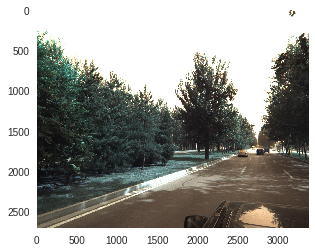

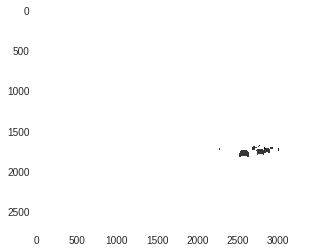

In [0]:
%matplotlib inline

plt.grid(False)
plt.imshow(X[0, :, :, :3])
plt.show()
plt.imshow(X[0, :, :, 3])
plt.show()

In [0]:
%matplotlib inline

import time
elapsed = time.time()

# Run detection
results = model.detect([X[0, :, :, :3]], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(X[0, :, :, :3], r['rois'], r['masks'],
                            r['class_ids'], class_names, r['scores'])

print('Time to Mask Image = ' + str(round(time.time() - elapsed, 4)) + ' seconds')

Autoencoder v1

In [0]:
intermediate_layer_model = Model(inputs=autoencoder_v1.input,
                                 outputs=autoencoder_v1
                                 .get_layer('encoder')
                                 .output)
v1_image = intermediate_layer_model.predict(X)
print(v1_image.shape)

(1, 2710, 3384, 3)


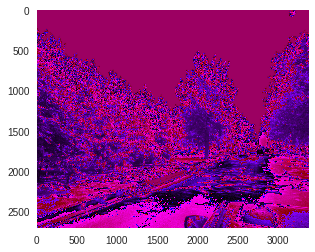

In [0]:
%matplotlib inline

plt.grid(False)
plt.imshow(v1_image[0, :, :, :])
plt.show()

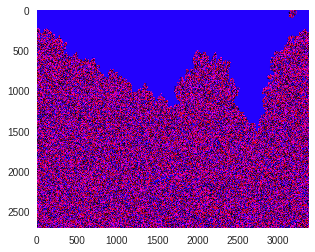

In [0]:
biggest = amax(v1_image)
t_v1_image = (255 / biggest) * v1_image
plt.grid(False)
plt.imshow(t_v1_image[0, :, :, :])
plt.show()

Processing 1 images
image                    shape: (2710, 3384, 3)       min:    0.00000  max:  254.99998  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.09471  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 3384.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


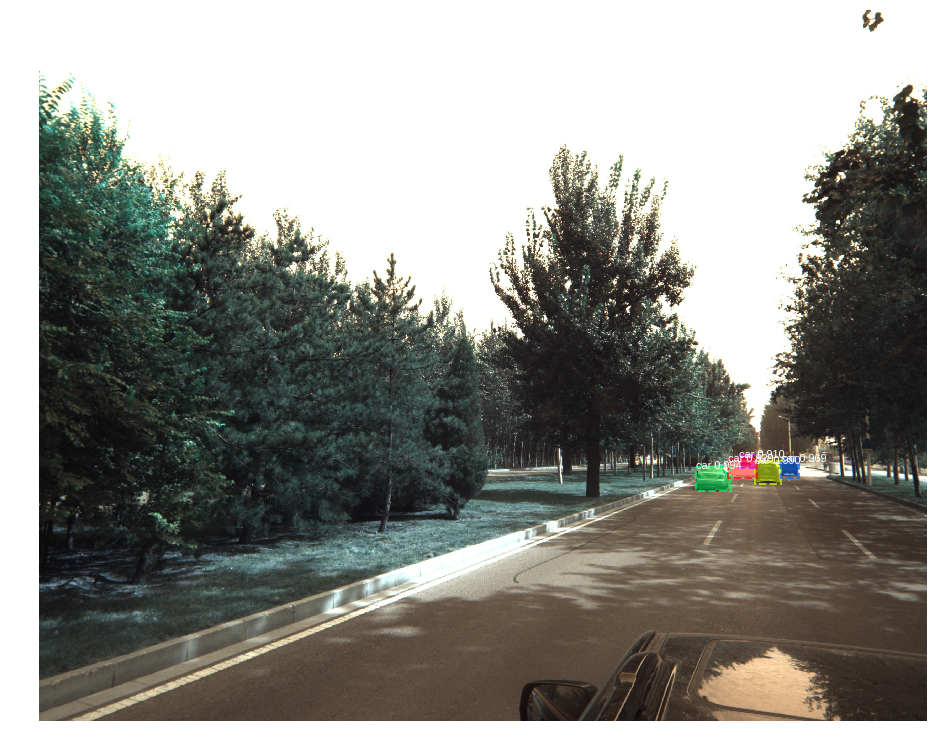

Time to Mask Image = 4.4678 seconds


In [0]:
%matplotlib inline

import time
elapsed = time.time()

biggest = amax(v1_image)
t_v1_image = (255 / biggest) * v1_image

# Run detection
results = model.detect(t_v1_image, verbose=1)

# Visualize results
r = results[0]
# visualize.display_instances(X[0, :, :, :3], r['rois'], r['masks'],
#                             r['class_ids'], class_names, r['scores'])
visualize.display_instances(drive_image, r['rois'], r['masks'],
                            r['class_ids'], class_names, r['scores'])

print('Time to Mask Image = ' + str(round(time.time() - elapsed, 4)) + ' seconds')

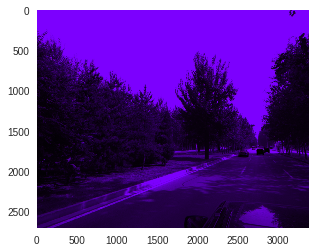

In [0]:
plt.grid(False)
plt.imshow(t_v1_image[0]/255)
plt.show()

autoencoder v2

In [0]:
intermediate_layer_model = Model(inputs=autoencoder_v2.input,
                                 outputs=autoencoder_v2
                                 .get_layer('encoder')
                                 .output)
v2_image = intermediate_layer_model.predict(X)
print(v2_image.shape)

(1, 2710, 3384, 3)


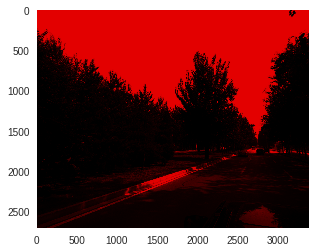

In [0]:
biggest = amax(v2_image)
t_v2_image = v2_image / biggest
plt.grid(False)
plt.imshow(t_v2_image[0, :, :, :])
plt.show()

Processing 1 images
image                    shape: (2710, 3384, 3)       min:    0.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  125.45244  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 3384.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


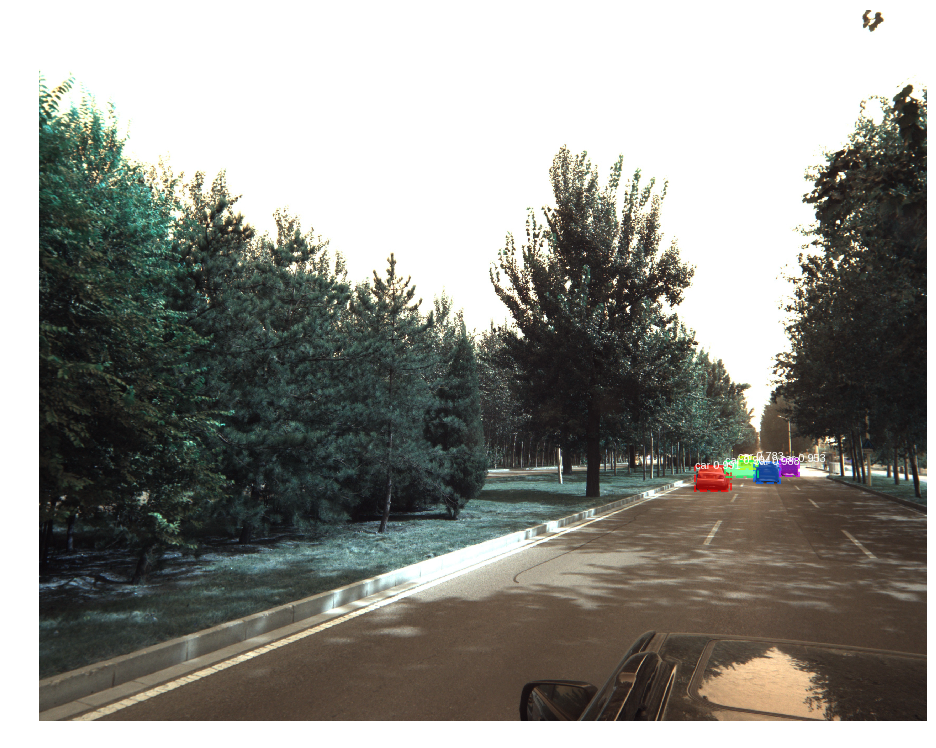

Time to Mask Image = 4.5542 seconds


In [0]:
%matplotlib inline

import time
elapsed = time.time()

biggest = amax(v2_image)
t_v2_image = (255 / biggest) * v2_image

# Run detection
results = model.detect(t_v2_image, verbose=1)

# Visualize results
r = results[0]
# visualize.display_instances(X[0, :, :, :3], r['rois'], r['masks'],
#                             r['class_ids'], class_names, r['scores'])
visualize.display_instances(drive_image, r['rois'], r['masks'],
                            r['class_ids'], class_names, r['scores'])

print('Time to Mask Image = ' + str(round(time.time() - elapsed, 4)) + ' seconds')

In [0]:
import skimage.io
skimage.io.imsave('wow.jpg', t_v2_image[0])

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [0]:
print(amax(t_v2_image))

1.4013935


In [0]:
download('wow.jpg')